<a href="https://colab.research.google.com/github/Joel-R-Castro/hello-github-actions/blob/Joel-R-Castro-patch-1/Bi2Mo2O9_HCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()

Saving data_N0.csv to data_N0.csv


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
import seaborn as sb
import numpy as np
import scipy
import pylab

#from matplotlib import rc

from matplotlib.pyplot import cm

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, complete
from pylab import rcParams

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import sklearn.metrics as sm

from sklearn.preprocessing import normalize

In [15]:
pd.read_csv('data_N0.csv', sep=';')
dfg = pd.read_csv('data_N0.csv', sep=';',decimal=',')

In [16]:
dfg

,Temperature,"100,05","100,66","101,28","101,89","102,51","103,12","103,74","104,35","104,96",...,"1294,47","1295,08","1295,70","1296,31","1296,93","1297,54","1298,16","1298,77","1299,39","1300,00"
0,12 K,5.05,5.04,5.03,5.03,5.04,5.04,5.04,5.04,5.03,...,4.99,4.99,4.99,4.99,4.99,4.99,4.98,4.99,4.99,4.99
1,30 K,4.56,4.55,4.54,4.54,4.55,4.55,4.55,4.55,4.54,...,4.53,4.53,4.53,4.53,4.53,4.53,4.53,4.53,4.53,4.53
2,50 K,4.13,4.12,4.12,4.13,4.13,4.13,4.13,4.13,4.13,...,4.10,4.10,4.10,4.10,4.10,4.10,4.10,4.10,4.10,4.10
3,70 K,3.67,3.66,3.66,3.66,3.67,3.67,3.67,3.67,3.66,...,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.63
4,90 K,3.25,3.25,3.25,3.25,3.26,3.26,3.26,3.25,3.25,...,3.22,3.22,3.22,3.22,3.22,3.22,3.22,3.22,3.22,3.22
5,110 K,2.80,2.80,2.80,2.81,2.81,2.81,2.81,2.80,2.80,...,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75
6,130 K,2.24,2.25,2.26,2.26,2.26,2.25,2.25,2.25,2.24,...,2.18,2.17,2.17,2.18,2.17,2.18,2.18,2.17,2.17,2.18
7,150 K,1.77,1.78,1.78,1.78,1.78,1.77,1.76,1.76,1.76,...,1.68,1.68,1.68,1.68,1.68,1.68,1.68,1.68,1.68,1.68
8,170 K,1.25,1.25,1.26,1.26,1.25,1.25,1.24,1.24,1.24,...,1.14,1.14,1.14,1.14,1.14,1.14,1.14,1.14,1.14,1.14
9,190 K,0.68,0.68,0.68,0.68,0.68,0.68,0.67,0.67,0.67,...,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57


In [17]:
dfp=dfg.drop(columns=['Temperature'])
dfp

,"100,05","100,66","101,28","101,89","102,51","103,12","103,74","104,35","104,96","105,58",...,"1294,47","1295,08","1295,70","1296,31","1296,93","1297,54","1298,16","1298,77","1299,39","1300,00"
0,5.05,5.04,5.03,5.03,5.04,5.04,5.04,5.04,5.03,5.02,...,4.99,4.99,4.99,4.99,4.99,4.99,4.98,4.99,4.99,4.99
1,4.56,4.55,4.54,4.54,4.55,4.55,4.55,4.55,4.54,4.55,...,4.53,4.53,4.53,4.53,4.53,4.53,4.53,4.53,4.53,4.53
2,4.13,4.12,4.12,4.13,4.13,4.13,4.13,4.13,4.13,4.13,...,4.10,4.10,4.10,4.10,4.10,4.10,4.10,4.10,4.10,4.10
3,3.67,3.66,3.66,3.66,3.67,3.67,3.67,3.67,3.66,3.66,...,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.63,3.63
4,3.25,3.25,3.25,3.25,3.26,3.26,3.26,3.25,3.25,3.26,...,3.22,3.22,3.22,3.22,3.22,3.22,3.22,3.22,3.22,3.22
5,2.80,2.80,2.80,2.81,2.81,2.81,2.81,2.80,2.80,2.80,...,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75
6,2.24,2.25,2.26,2.26,2.26,2.25,2.25,2.25,2.24,2.24,...,2.18,2.17,2.17,2.18,2.17,2.18,2.18,2.17,2.17,2.18
7,1.77,1.78,1.78,1.78,1.78,1.77,1.76,1.76,1.76,1.75,...,1.68,1.68,1.68,1.68,1.68,1.68,1.68,1.68,1.68,1.68
8,1.25,1.25,1.26,1.26,1.25,1.25,1.24,1.24,1.24,1.23,...,1.14,1.14,1.14,1.14,1.14,1.14,1.14,1.14,1.14,1.14
9,0.68,0.68,0.68,0.68,0.68,0.68,0.67,0.67,0.67,0.67,...,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57


In [18]:
df=pd.DataFrame(normalize(dfp), columns=dfp.columns)
df

,"100,05","100,66","101,28","101,89","102,51","103,12","103,74","104,35","104,96","105,58",...,"1294,47","1295,08","1295,70","1296,31","1296,93","1297,54","1298,16","1298,77","1299,39","1300,00"
0,0.022799,0.022754,0.022709,0.022709,0.022754,0.022754,0.022754,0.022754,0.022709,0.022663,...,0.022528,0.022528,0.022528,0.022528,0.022528,0.022528,0.022483,0.022528,0.022528,0.022528
1,0.022676,0.022626,0.022577,0.022577,0.022626,0.022626,0.022626,0.022626,0.022577,0.022626,...,0.022527,0.022527,0.022527,0.022527,0.022527,0.022527,0.022527,0.022527,0.022527,0.022527
2,0.022650,0.022595,0.022595,0.022650,0.022650,0.022650,0.022650,0.022650,0.022650,0.022650,...,0.022485,0.022485,0.022485,0.022485,0.022485,0.022485,0.022485,0.022485,0.022485,0.022485
3,0.022690,0.022628,0.022628,0.022628,0.022690,0.022690,0.022690,0.022690,0.022628,0.022628,...,0.022443,0.022443,0.022443,0.022443,0.022443,0.022443,0.022443,0.022443,0.022443,0.022443
4,0.022645,0.022645,0.022645,0.022645,0.022714,0.022714,0.022714,0.022645,0.022645,0.022714,...,0.022436,0.022436,0.022436,0.022436,0.022436,0.022436,0.022436,0.022436,0.022436,0.022436
5,0.022745,0.022745,0.022745,0.022826,0.022826,0.022826,0.022826,0.022745,0.022745,0.022745,...,0.022339,0.022339,0.022339,0.022339,0.022339,0.022339,0.022339,0.022339,0.022339,0.022339
6,0.022855,0.022957,0.023059,0.023059,0.023059,0.022957,0.022957,0.022957,0.022855,0.022855,...,0.022243,0.022141,0.022141,0.022243,0.022141,0.022243,0.022243,0.022141,0.022141,0.022243
7,0.023206,0.023337,0.023337,0.023337,0.023337,0.023206,0.023075,0.023075,0.023075,0.022943,...,0.022026,0.022026,0.022026,0.022026,0.022026,0.022026,0.022026,0.022026,0.022026,0.022026
8,0.023654,0.023654,0.023843,0.023843,0.023654,0.023654,0.023465,0.023465,0.023465,0.023275,...,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572,0.021572
9,0.024471,0.024471,0.024471,0.024471,0.024471,0.024471,0.024111,0.024111,0.024111,0.024111,...,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512,0.020512


In [19]:
x=dfp.values
y=dfg.iloc[:,(0)]

In [20]:
z=linkage(x,'average')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

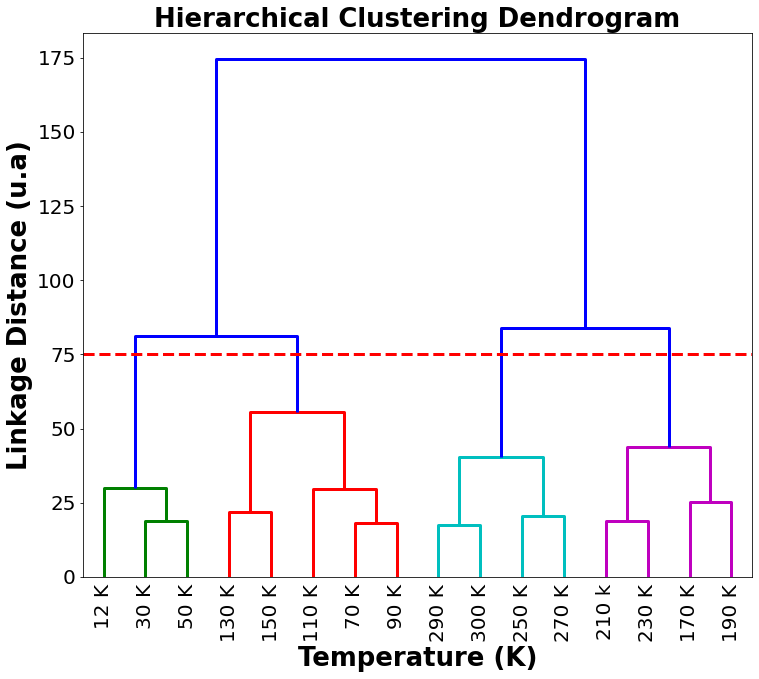

In [28]:
mpl.use('Agg')
plt.figure(figsize=(12,10))
mpl.rcParams['lines.linewidth'] = 3

D_leaf_colors = {"12 K": "#808080", # Unclustered gray
                 "30 K": "#808080", # Unclustered gray
                 "50 K": "#808080", # Unclustered gray
                 "70 K": "#808080", # Unclustered gray

                 "90 K": "#B061FF", # Cluster 1 indigo
                 "110 K": "#B061FF",

                 "130 K": "#B061FF",
                 "150 K": "#B061FF",
                 "170 K": "#B061FF",
                 "190 K": "#B061FF",
                 "210 K": "#B061FF",

                 "230 K": "#61ffff", # Cluster 2 cyan
                 "250 K": "#61ffff",
                 "270 K": "#61ffff",

                 "290 K": "#B061FF",
                 "300 K": "#B061FF"
                 }

dendrogram(z, truncate_mode='level', p=25, leaf_rotation=90, leaf_font_size=20, show_contracted=True, labels=list(y), count_sort=True, color_threshold=75, above_threshold_color="blue")
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
plt.title('Hierarchical Clustering Dendrogram', fontsize=26 , fontweight='bold')
#cmap = cm.rainbow(np.linspace(0, 1, 10))
#hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])

plt.xlabel('Temperature (K)', fontsize=26 , fontweight='bold')
plt.ylabel('Linkage Distance (u.a)', fontsize=26 , fontweight='bold')

ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)

for label in ax.get_xticklabels():
    label.set_fontweight(550)

for label in ax.get_yticklabels():
    label.set_fontweight(550)

#plt.figure(figsize=(16,12))
#plt.axhline(y=80, color='r', linestyle='--')
#plt.axhline(y=50, color='r', linestyle='--')
plt.axhline(y=75, color='r', linestyle='--')

plt.show()

from google.colab import files
fig = plt.savefig('HCA-MnMoO4.tiff')
files.download('HCA-MnMoO4.tiff') 